In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [5]:
data=pd.read_csv(r"C:\Users\Jishanth M I\Downloads\ds1_c4_s7_practice-master\ds1_c4_s7_practice-master\DS1_C4_S7_Students_Scores_Data_Practice.csv")
data

,Statistics,Python,Tableau
0,61,86,66
1,54,86,72
2,56,80,78
3,54,85,45
4,53,84,68
...,...,...,...
95,60,76,64
96,59,89,70
97,62,80,46
98,58,89,74


In [14]:
# Task 1
#Use the measures of central tendency to identify the subject in which the students have shown the best performance.While comparing the performance of three different subjects, one might just look at the average score in each subject and compare which subject has the highest average score and declare that subject as the one in which students have performed the best. Here, you need to look beyond the mean.
#Hint: Use the measures of mean, median, and mode to perform this task.


df=pd.DataFrame()
df['Measure']=['Mean','Median','Mode']
for i in data.columns:
    df[i]=[data[i].mean(),data[i].median(),data[i].mode()[0]]
    
df

,Measure,Statistics,Python,Tableau
0,Mean,60.89,81.84,68.02
1,Median,60.00,82.00,69.00
2,Mode,55.00,86.00,65.00


In [18]:
# Task 2
#Measure variability to identify the subject that shows the best performance for the class.
#Hint: Calculate the variance, coefficient of variation, and mean to perform the above task


df2=pd.DataFrame()
df2['Measure']=['Mean','Std','COV']
for i in data.columns:
    df2[i]=[data[i].mean(),data[i].std(),data[i].std()/data[i].mean()*100]
    
df2

,Measure,Statistics,Python,Tableau
0,Mean,60.890000,81.840000,68.020000
1,Std,7.236126,4.345484,7.320899
2,COV,11.883931,5.309731,10.762862


In [30]:
# Task 3
#Identify the subject in which the scores are the most skewed.
#Hint: Calculate the outliers to identify skewness.

df3=pd.DataFrame()
df3['Measure']=['Min', 'Max', 'Range', 'Q1', 'Q3', 'IQR', 'LF', 'UF','LO','UO']
for i in data.columns:
    min=data[i].min()
    max=data[i].max()
    range=max-min
    q1=data[i].quantile(.25)
    q3=data[i].quantile(.75)
    iqr=q3-q1
    lf=q1-1.5*iqr
    uf=q3+1.5*iqr
    
    uo=[]
    lo=[]
    for val in data[i]:
        if val>uf:
            uo.append(val)
        elif val<lf:
            lo.append(val)
    
    df3[i]=[min,max,range,q1,q3,iqr,lf,uf,lo,uo] 
    
df3

,Measure,Statistics,Python,Tableau
0,Min,50,75,45
1,Max,74,89,79
2,Range,24,14,34
3,Q1,54.0,78.0,64.0
4,Q3,67.0,86.0,73.25
5,IQR,13.0,8.0,9.25
6,LF,34.5,66.0,50.125
7,UF,86.5,98.0,87.125
8,LO,[],[],"[45, 50, 50, 50, 46, 46]"
9,UO,[],[],[]


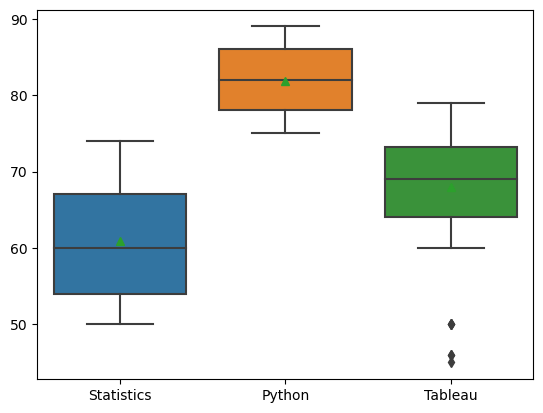

In [31]:
# Task 4
# Visually present the distribution of scores obtained by the students in different subjects using box plots. Identify the subject for which the scores are the most skewed.


sb.boxplot(data=data,showmeans=True)
plt.show()

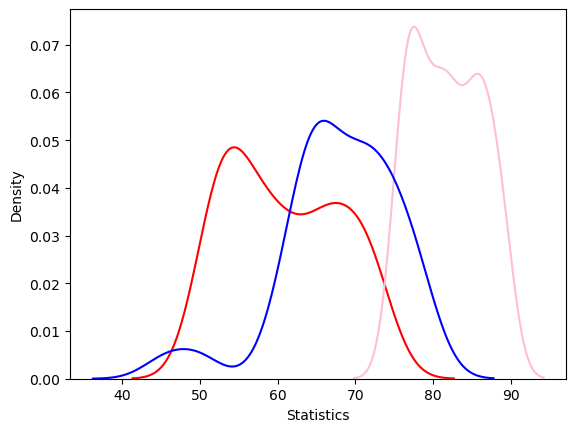

In [35]:
# Task 5
#Present the distribution of data for each subject using normal distribution curves (bell curves). Observe and report the Kurtosis analysis for every subject.

sb.kdeplot(x=data['Statistics'],color='red')
sb.kdeplot(x=data['Python'],color='pink')
sb.kdeplot(x=data['Tableau'],color='blue')
plt.show()